In [41]:
from analysis import AnalysisTargets, ClusterFinancials
from data import FinancialsData
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap

In [2]:
cf = ClusterFinancials()
gmm = list(cf.gmm.cluster())
#print(gmm)
cluster_count = max(set([i[1] for i in gmm]))
gmm_dict = dict()
for i in range(0, cluster_count + 1):
    gmm_dict[i] = []    
for i in gmm:
    gmm_dict[i[1]].append(i[0])
for k in gmm_dict:
    df = pd.DataFrame()
    at = AnalysisTargets()
    for symbol in gmm_dict[k]:
        df = pd.concat([df, at.create_target_dataset(symbol)])
    print(f"Cluster {k+1}:\n{gmm_dict[k]}")
    print(df.describe())

Cluster 1:
['MCD', 'NKE', 'PM', 'SBUX', 'MDLZ', 'DEO', 'BKNG', 'TJX', 'MO', 'BTI', 'CL', 'CMG', 'ORLY', 'HSY', 'RACE', 'MAR', 'GIS', 'KHC', 'KMB', 'ABEV', 'LULU', 'LVS', 'DHI', 'YUM', 'HLT', 'ROST', 'LEN', 'YUMC', 'MKC', 'K', 'QSR', 'CHD', 'HRL', 'GPC', 'TCOM', 'GRMN', 'CLX', 'DRI', 'TSN', 'CAG', 'LW', 'BBY', 'SJM', 'CPB', 'PHM', 'MGM', 'LKQ', 'TAP', 'DECK', 'POOL', 'HTHT', 'KMX', 'IHG', 'WYNN', 'ARMK', 'DPZ', 'CHDN', 'MTN', 'BURL', 'FND', 'SCI', 'PAG', 'TPR', 'HAS', 'SKX', 'TOL', 'WSM', 'TXRH']
               Open          High           Low         Close     Adj Close  \
count  34272.000000  34272.000000  34272.000000  34272.000000  34272.000000   
mean     174.883510    177.110004    172.691677    174.931473    174.756472   
std      333.457504    337.878577    329.183691    333.575093    333.594457   
min        2.430000      2.450000      2.400000      2.440000      2.440000   
25%       54.077501     54.687499     53.410000     54.117499     54.060001   
50%       87.884998     8

## T-SNE (Base Model)

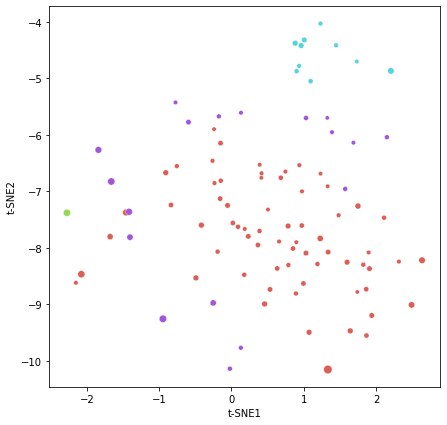

In [105]:
fd = FinancialsData()
results = cf.tsne.reduce(perplexity=55, n_iter=5000)
df_1 = pd.DataFrame(columns=["t-SNE1", "t-SNE2", "AvgVolatility", "Sector", "Cluster", "Industry"])
df_1["t-SNE1"] = results[:, 0]
df_1["t-SNE2"] = results[:, 1]
#df["MarketCap"] = fd.get_yfinance_data()["DilutedEPS"]
df_1["Sector"] = fd.get_yfinance_data()["Sector"]
df_1["Industry"] = fd.get_yfinance_data()["Sector"]
df_1["Symbol"] = fd.get_yfinance_data().symbol

cf.gmm.cluster(n_components=4)
#print(list(cf.gmm.cluster(n_components=4)))

cluster_assignments = [i[1] for i in cf.gmm.cluster()]
for k, v in cf.gmm.cluster():
     df_1.loc[(df["Symbol"] == k), "Cluster"] = v
for i in df_1["Symbol"]:
    at = AnalysisTargets()
    mean = at.create_target_dataset(i)['Deviation'].mean()
    df_1.loc[(df_1["Symbol"] == i), "AvgVolatility"] = mean
    
    
num_colors = len(set(df_1["Cluster"]))
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="t-SNE1",
    y="t-SNE2",
    hue="Cluster",
    size="AvgVolatility",
    data=df,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()

In [106]:
pd.set_option('display.max_rows', None)
ideal_clusters = cf.gmm.cluster_probabilities(n_components = 4)
ideal_clusters
# cf.gmm.ideal_cluster_num()

,Component0,Component1,Component2,Component3
TSLA,0.000,0.0,1.0,0.000
PG,0.000,0.0,1.0,0.000
HD,0.000,0.0,1.0,0.000
MCD,0.000,0.0,0.0,1.000
TM,0.000,0.0,1.0,0.000
NKE,0.000,0.0,0.0,1.000
PM,0.000,0.0,0.0,1.000
LOW,0.000,0.0,1.0,0.000
SONY,0.000,0.0,1.0,0.000
SBUX,0.029,0.0,0.0,0.971


#why GMM
GMM is very useful here. 

Compared to K-means it can capture more complicated normal distributions of the data, whereas K-means
largely targets spherical shapes in the data.

We also expect clusters to have varying densities and sizes. For example, we expect most stocks to be associated with neutral performance, and some stocks associated with positive and negative performance. GMM tends to perform quite well in these conditions, whereas K-means and DBSCAN will typically struggle here. 

Lastly, it makes intuitive sense to assign soft-clustering for our purposes. If the latent variables are associated with investor sentiment/performance then we expect many stocks, probability wise, to fall into multiple different clusters.



#We used BIC to determine the ideal number of clusters. This is an effective feature evaluation method because it can control for overfitting while maximizing log-likelihood. BIC determined that the ideal number of clusters for GMM is 4 clusters.

In [26]:
cf_with_sentiment = ClusterFinancials(sentiment=True)



print(cf_with_sentiment.gmm.ideal_cluster_num())
cf_with_sentiment.gmm.cluster_probabilities(n_components=3)


1


,Component0,Component1,Component2
TSLA,0.000,0.000,1.000
PG,0.000,0.000,1.000
HD,0.000,0.000,1.000
MCD,0.000,0.000,1.000
TM,0.000,1.000,0.000
NKE,0.000,0.000,1.000
PM,0.059,0.000,0.941
LOW,0.000,0.000,1.000
SONY,0.000,0.001,0.999
SBUX,0.995,0.000,0.005


## T-SNE with Cluster Sentiments

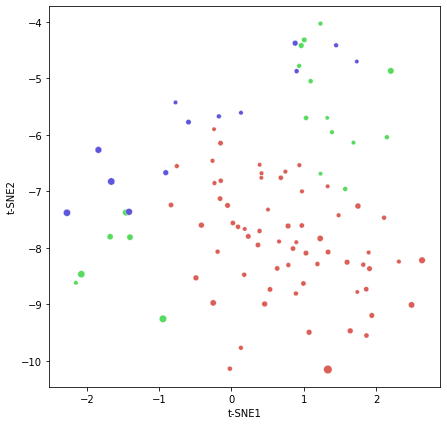

In [111]:
cf_with_sentiment = ClusterFinancials(sentiment=True)
results = cf_with_sentiment.tsne.reduce(perplexity=55, n_iter=5000)
df_1 = pd.DataFrame(columns=["t-SNE1", "t-SNE2", "AvgVolatility", "Sector", "Cluster", "Industry"])
df_1["t-SNE1"] = results[:, 0]
df_1["t-SNE2"] = results[:, 1]
df_1["Sector"] = cf_with_sentiment.get_yfinance_data()["Sector"]
df_1["Industry"] = cf_with_sentiment.get_yfinance_data()["Sector"]
df_1["Symbol"] = cf_with_sentiment.get_yfinance_data().symbol


cluster_assignments = [i[1] for i in cf_with_sentiment.gmm.cluster(n_components = 3)]
for k, v in cf_with_sentiment.gmm.cluster(n_components = 3):
    df.loc[(df_1["Symbol"] == k), "Cluster"] = v
for i in df_1["Symbol"]:
    at = AnalysisTargets()
    mean = at.create_target_dataset(i)['Deviation'].mean()
    df_1.loc[(df["Symbol"] == i), "AvgVolatility"] = mean

num_colors = 3
plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="t-SNE1",
    y="t-SNE2",
    hue="Cluster",
    size="AvgVolatility",
    data=df,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()


## UMAP (Base Model)

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score


# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [10, 20, 30, 40, 50],
    'min_dist': [0.1, 0.2, 0.3, 0.4, 0.5]
}

reducer = umap.UMAP(random_state=42)

def umap_silhouette_scorer(estimator, X):
    embeddings = estimator.transform(X)
    labels = estimator.gmm.fit_predict(embeddings)
    return silhouette_score(embeddings, labels)


In [113]:
# Perform grid search
grid_search = GridSearchCV(reducer, param_grid, cv = 5, scoring = umap_silhouette_scorer)
grid_search.fit(cf.umap.reduce())
print(grid_search.best_estimator_)

UMAP(n_neighbors=10, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})


In [114]:
# Get the best UMAP model from grid search
best_reducer = grid_search.best_estimator_


# Perform UMAP dimensionality reduction
results_base = best_reducer.transform(cf.umap.reduce())

df["UMAP1"] = results_base[:, 0]
df["UMAP2"] = results_base[:, 1]


In [115]:
num_colors = 4
cluster_assignments = [i[1] for i in cf.gmm.cluster(n_components = 4)]
for k, v in cf.gmm.cluster(n_components = 4):
    df.loc[(df["Symbol"] == k), "Cluster"] = v

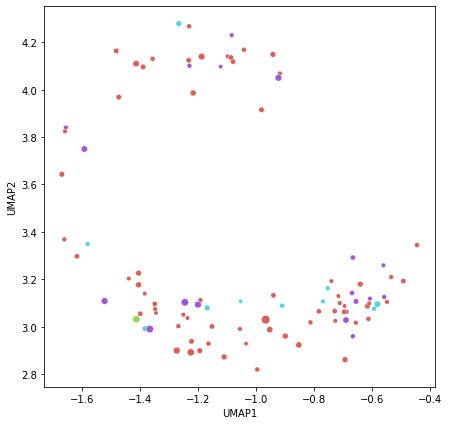

In [116]:
plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="Cluster",
    size="AvgVolatility",
    data=df,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()

In [117]:
print(grid_search.best_params_)

{'min_dist': 0.1, 'n_neighbors': 10}


## UMAP (Sentiment Model)


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

reducer = umap.UMAP(random_state=42)

# Perform grid search
#import pdb; pdb.set_trace()
grid_search_sent = GridSearchCV(reducer, param_grid, cv = 5, scoring = umap_silhouette_scorer)
grid_search_sent.fit(cf_with_sentiment.umap.reduce())
print("Best Silhouette Score:", grid_search_sent.best_params_)

Best Silhouette Score: {'min_dist': 0.1, 'n_neighbors': 10}


In [119]:
# Get the best UMAP model from grid search
best_reducer_sent = grid_search_sent.best_estimator_


# Perform UMAP dimensionality reduction
results_sent = best_reducer_sent.transform(cf_with_sentiment.umap.reduce())

df["UMAP1"] = results_sent[:, 0]
df["UMAP2"] = results_sent[:, 1]

In [124]:
num_colors = 4
cluster_assignments = [i[1] for i in cf_with_sentiment.gmm.cluster(n_components = 4)]
for k, v in cf_with_sentiment.gmm.cluster(n_components = 4):
    df.loc[(df["Symbol"] == k), "Cluster"] = v

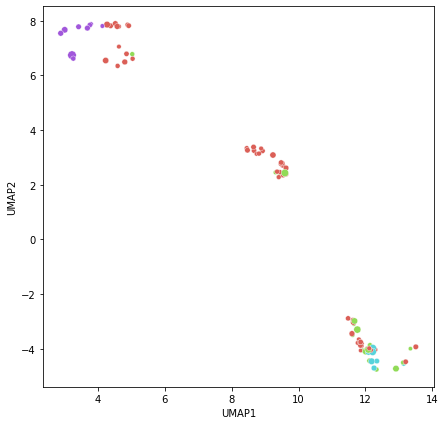

In [125]:
plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="Cluster",
    size="AvgVolatility",
    data=df,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()

In [81]:
print(grid_search_sent.best_params_)

{'min_dist': 0.1, 'n_neighbors': 10}
